# Análisis del efecto de las optimizaciones en el modelo que trabaja con datos de audio
Se comprueba y compara el rendimiento de un modelo convertido a TensorFlow Lite en función del tipo de optimización
aplicada.
## Imports

In [1]:
from audio_model_evaluation import tensorflow_lite_model_evaluation

## Parámetros
Parámetros del análisis que se efectuará.

In [2]:
project_dir = "/home/daniel/PycharmProjects/tfg-tinyml"
saved_models_dir = f"{project_dir}/saved models/audio"
micro_data_all_dir = f"{project_dir}/samples/microcontroller/audio/all"
ext_data_test_dir = f"{project_dir}/samples/external/audio/test"
non_quantized_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModel.tflite"
quantized_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModelQuant.tflite"
qat_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModelQAT.tflite"
label_index_dir = f"{saved_models_dir}/label index mappings"
label_index_path = f"{label_index_dir}/ExtAudioDataModel.joblib"

## Modelo sin cuantizar
Comprobamos el rendimiento del modelo sin cuantizar sobre los datos de la partición test externa y los datos captados
con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModel.tflite".
Model size 14.58984375 Kb
Using 3230 samples.
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


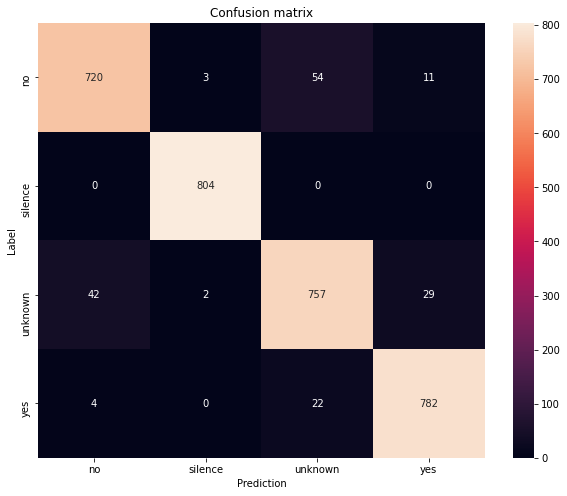

              precision    recall  f1-score   support

          no    0.93995   0.91371   0.92664       788
     silence    0.99382   1.00000   0.99690       804
     unknown    0.90876   0.91205   0.91040       830
         yes    0.95134   0.96782   0.95951       808

    accuracy                        0.94830      3230
   macro avg    0.94847   0.94839   0.94836      3230
weighted avg    0.94819   0.94830   0.94818      3230

Average time: 0.2695203934660637 ms
Max time: 6.794214248657227 ms
Min time: 0.11181831359863281 ms
Using 452 samples.


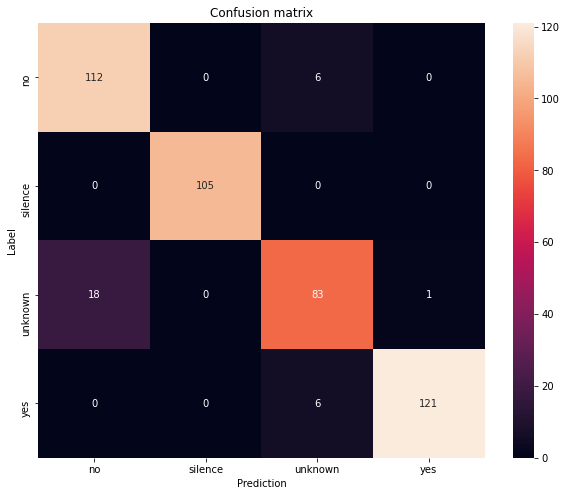

              precision    recall  f1-score   support

          no    0.86154   0.94915   0.90323       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.87368   0.81373   0.84264       102
         yes    0.99180   0.95276   0.97189       127

    accuracy                        0.93142       452
   macro avg    0.93176   0.92891   0.92944       452
weighted avg    0.93305   0.93142   0.93133       452

Average time: 0.28810722638020475 ms
Max time: 0.6892681121826172 ms
Min time: 0.11396408081054688 ms


In [3]:
tensorflow_lite_model_evaluation(non_quantized_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path)

## Modelo cuantizado
Comprobamos el rendimiento del modelo cuantizado sobre los datos de la partición test externa y los datos captados
con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModelQuant.tflite".
Model size 5.890625 Kb
Using 3230 samples.


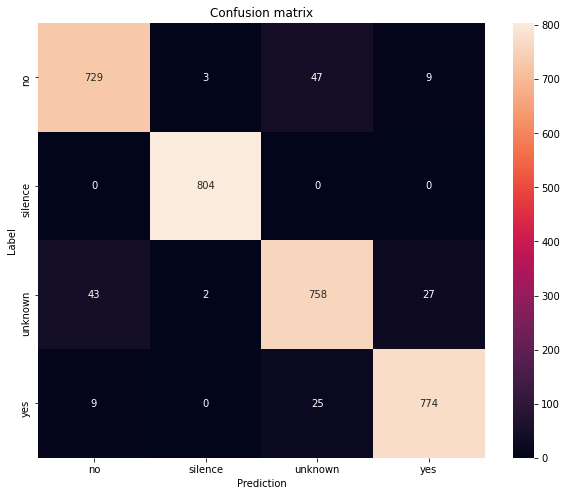

              precision    recall  f1-score   support

          no    0.93342   0.92513   0.92925       788
     silence    0.99382   1.00000   0.99690       804
     unknown    0.91325   0.91325   0.91325       830
         yes    0.95556   0.95792   0.95674       808

    accuracy                        0.94892      3230
   macro avg    0.94901   0.94908   0.94904      3230
weighted avg    0.94881   0.94892   0.94886      3230

Average time: 1.57524867692599 ms
Max time: 20.982027053833008 ms
Min time: 0.6339550018310547 ms
Using 452 samples.


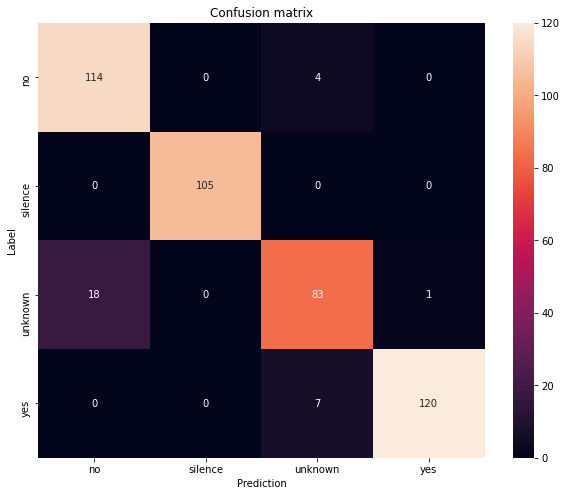

              precision    recall  f1-score   support

          no    0.86364   0.96610   0.91200       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.88298   0.81373   0.84694       102
         yes    0.99174   0.94488   0.96774       127

    accuracy                        0.93363       452
   macro avg    0.93459   0.93118   0.93167       452
weighted avg    0.93567   0.93363   0.93342       452

Average time: 1.5546927409889424 ms
Max time: 5.070686340332031 ms
Min time: 0.6356239318847656 ms
Quantized models can perform slower as they are intended to work on ARM devices.


In [4]:
tensorflow_lite_model_evaluation(quantized_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path,
                                 quantized=True)

## Modelo QAT
Comprobamos el rendimiento del modelo cuantizado durante el entrenamiento sobre los datos de la partición test externa y
los datos captados con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModelQAT.tflite".
Model size 6.1328125 Kb
Using 3230 samples.


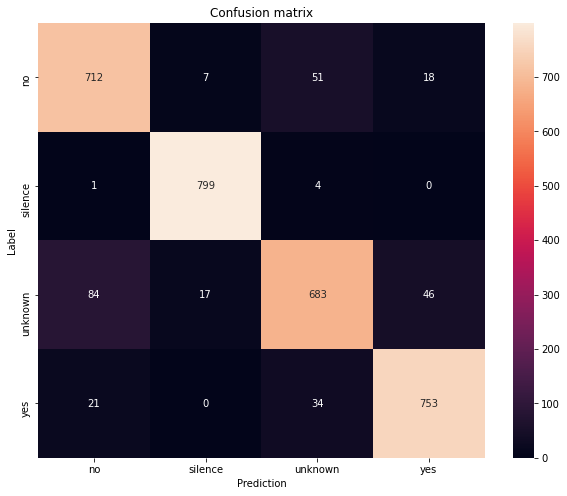

              precision    recall  f1-score   support

          no    0.87042   0.90355   0.88667       788
     silence    0.97084   0.99378   0.98218       804
     unknown    0.88472   0.82289   0.85268       830
         yes    0.92166   0.93193   0.92677       808

    accuracy                        0.91238      3230
   macro avg    0.91191   0.91304   0.91208      3230
weighted avg    0.91191   0.91238   0.91174      3230

Average time: 1.5875064920714765 ms
Max time: 11.215448379516602 ms
Min time: 0.6358623504638672 ms
Using 452 samples.


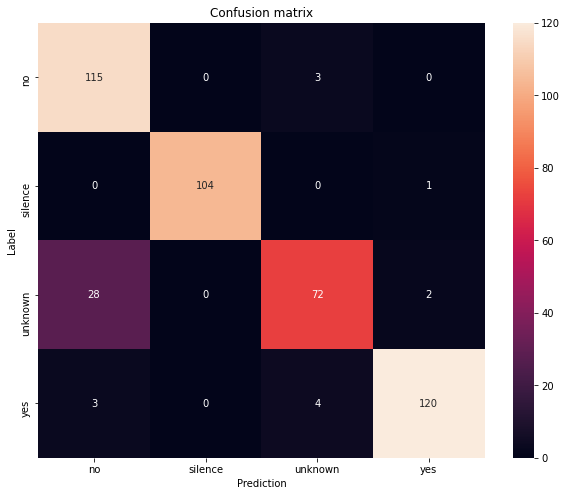

              precision    recall  f1-score   support

          no    0.78767   0.97458   0.87121       118
     silence    1.00000   0.99048   0.99522       105
     unknown    0.91139   0.70588   0.79558       102
         yes    0.97561   0.94488   0.96000       127

    accuracy                        0.90929       452
   macro avg    0.91867   0.90395   0.90550       452
weighted avg    0.91772   0.90929   0.90790       452

Average time: 1.4756321907043457 ms
Max time: 7.049560546875 ms
Min time: 0.6363391876220703 ms
Quantized models can perform slower as they are intended to work on ARM devices.


In [5]:
tensorflow_lite_model_evaluation(qat_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path,
                                 quantized=True)

